<a href="https://colab.research.google.com/github/saikumarbysani/PortFolioProject/blob/main/XGBoost_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats.stats import f_oneway,F_onewayResult
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from pmdarima.arima import auto_arima

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# regression error metrics - scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy.stats

# regression error metrics - scikit-learn
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import meanabs

# Some tests/statistics required for validating assumptions
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# df1=pd.read_excel("/content/drive/MyDrive/Lego/final_data_2.xlsx")

In [ ]:
df1=pd.read_excel("/content/drive/MyDrive/Lego/final_data_quantity_total.xlsx")

In [ ]:
df1.head()

,Unnamed: 0,Date,Market Volume,Personal_Saving,Saving_Rate,Disposable_Income,Toy_CPI,Personal_Expenditure,PPI,Inflation Rates,...,Unemp_state_Washington,Unemp_state_West Virginia,Unemp_state_Wisconsin,Unemp_state_Wyoming,Unemp_state_Puerto Rico,positive,negative,neutral,sales_qty,sales_nip
0,0.0,2017-01-01,1181.0,1000.5,6.9,13747.2,38.903,13020.4,91.7,2.5,...,4.8,5.4,3.5,4.8,11.8,1169.0,428.0,1404.0,3245862.0,42421716.96
1,1.0,2017-02-01,1180.0,1043.5,7.2,13783.4,38.728,13038.6,89.7,2.7,...,4.7,5.2,3.4,4.6,11.5,1224.0,354.0,1423.0,4191633.0,51423021.12
2,2.0,2017-03-01,1354.0,1047.1,7.2,13840.4,38.416,13089.3,90.7,2.4,...,4.6,5.1,3.3,4.4,11.2,1027.0,457.0,1517.0,4908765.0,62545641.48
3,3.0,2017-04-01,1277.0,1071.8,7.3,13864.5,38.057,13114.1,92.9,2.2,...,4.6,5.0,3.3,4.2,10.9,1014.0,420.0,1567.0,4212361.0,52991029.95
4,4.0,2017-05-01,1246.0,1157.0,7.8,13957.3,37.812,13117.6,92.9,1.9,...,4.6,5.0,3.2,4.1,10.6,1076.0,432.0,1493.0,3180010.0,44400646.34


In [ ]:
df1.Date=pd.to_datetime(df1.Date)

In [ ]:
df1['month']=df1['Date'].dt.month

In [ ]:
df1=df1.drop(['Unnamed: 0'],axis=1)

In [ ]:
lis=['positive','negative','neutral']
for i in lis:
  df1[i]=df1[i]/3000

In [ ]:
df1.head()

,Date,Market Volume,Personal_Saving,Saving_Rate,Disposable_Income,Toy_CPI,Personal_Expenditure,PPI,Inflation Rates,FEDFUNDS,...,Unemp_state_West Virginia,Unemp_state_Wisconsin,Unemp_state_Wyoming,Unemp_state_Puerto Rico,positive,negative,neutral,sales_qty,sales_nip,month
0,2017-01-01,1181.0,1000.5,6.9,13747.2,38.903,13020.4,91.7,2.5,0.65,...,5.4,3.5,4.8,11.8,0.389667,0.142667,0.468000,3245862.0,42421716.96,1
1,2017-02-01,1180.0,1043.5,7.2,13783.4,38.728,13038.6,89.7,2.7,0.66,...,5.2,3.4,4.6,11.5,0.408000,0.118000,0.474333,4191633.0,51423021.12,2
2,2017-03-01,1354.0,1047.1,7.2,13840.4,38.416,13089.3,90.7,2.4,0.79,...,5.1,3.3,4.4,11.2,0.342333,0.152333,0.505667,4908765.0,62545641.48,3
3,2017-04-01,1277.0,1071.8,7.3,13864.5,38.057,13114.1,92.9,2.2,0.90,...,5.0,3.3,4.2,10.9,0.338000,0.140000,0.522333,4212361.0,52991029.95,4
4,2017-05-01,1246.0,1157.0,7.8,13957.3,37.812,13117.6,92.9,1.9,0.91,...,5.0,3.2,4.1,10.6,0.358667,0.144000,0.497667,3180010.0,44400646.34,5


### checking feature importance plot to drop the unimportant features

## XGBoost Importance

In [ ]:
X = df1.drop(['sales_qty',"Date"],axis=1)

In [ ]:
y = df1['sales_qty']

In [ ]:
model = XGBRegressor()
model.fit(X, y)

[16:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
imp=pd.DataFrame(model.feature_importances_)

Text(0.5, 0, 'Xgboost Feature Importance')

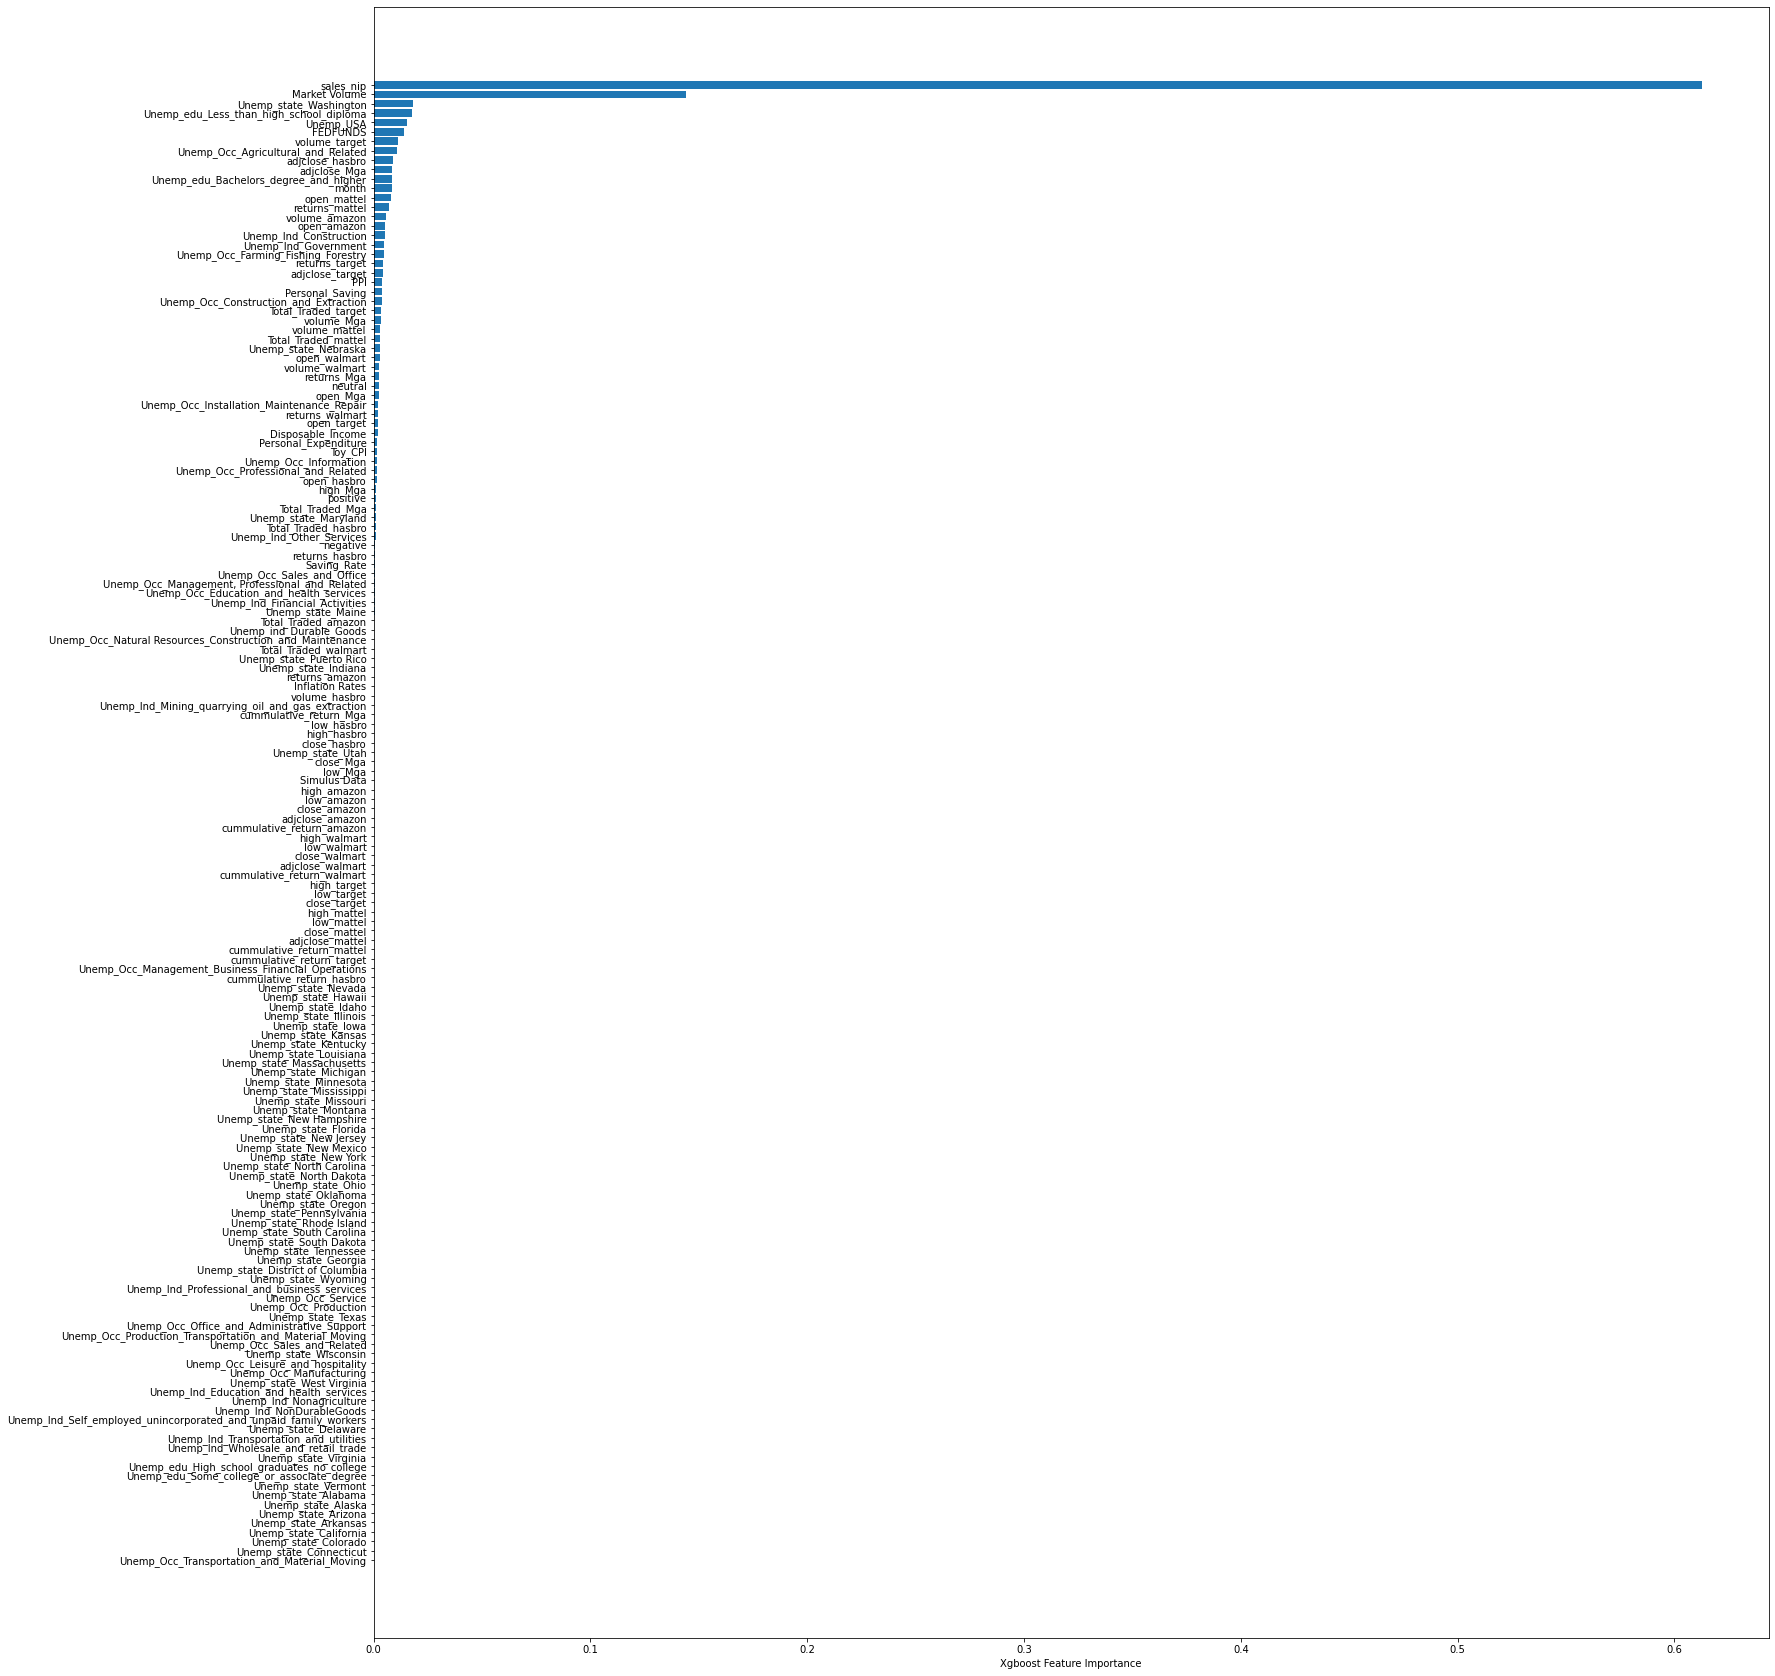

In [ ]:
plt.figure(figsize=(25, 30))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
df2=df1.drop(['Unemp_Occ_Professional_and_Related','Unemp_Ind_Financial_Activities','Unemp_state_Mississippi',
 'Unemp_state_South Carolina','Unemp_state_Arizona','Unemp_edu_High_school_graduates_no_college',
 'Unemp_state_Alaska','Unemp_state_Louisiana','Unemp_edu_Less_than_high_school_diploma','open_mattel','Unemp_Occ_Production_Transportation_and_Material_Moving',
'Unemp_Occ_Management, Professional_and_Related','Unemp_state_Kentucky','returns_mattel','Unemp_state_South Dakota','Total_Traded_target','Unemp_Ind_NonDurableGoods',
 'Unemp_state_Virginia','Unemp_state_Puerto Rico','volume_amazon','Unemp_state_Wyoming',
 'Unemp_state_Idaho','Unemp_state_Pennsylvania','Unemp_state_Iowa','returns_hasbro','Unemp_Ind_Construction',
'cummulative_return_hasbro','Unemp_state_Maryland','Unemp_state_Florida',
 'Unemp_Occ_Education_and_health_services','cummulative_return_amazon',
 'volume_Mga','low_hasbro','Unemp_edu_Bachelors_degree_and_higher',
 'Unemp_state_Wisconsin','Unemp_state_Rhode Island','low_mattel',
 'open_target','Unemp_state_Michigan','Unemp_Ind_Transportation_and_utilities','cummulative_return_mattel',
 'volume_target','low_walmart','Personal_Saving','high_amazon',
 'cummulative_return_Mga','Unemp_Occ_Transportation_and_Material_Moving','Unemp_state_Georgia','Total_Traded_mattel',
 'Unemp_Occ_Manufacturing','Unemp_Occ_Production','Unemp_Occ_Construction_and_Extraction','Unemp_state_West Virginia',
 'high_hasbro','adjclose_walmart','Unemp_state_North Dakota','Unemp_Ind_Education_and_health_services',
 'returns_amazon','Unemp_state_California','volume_mattel','Unemp_state_Maine',
 'close_Mga','Unemp_state_Massachusetts','close_mattel','Unemp_Ind_Government',
 'Unemp_state_Utah', 'Unemp_Occ_Natural Resources_Construction_and_Maintenance', 'volume_walmart', 'Unemp_state_Ohio',
 'returns_target', 'Unemp_state_District of Columbia', 'Unemp_Ind_Other_Services', 'Unemp_Occ_Leisure_and_hospitality',
 'Unemp_state_New Jersey', 'Unemp_Occ_Information', 'Unemp_Occ_Office_and_Administrative_Support', 'Unemp_state_Arkansas',
 'high_Mga', 'close_hasbro', 'Personal_Expenditure', 'Unemp_state_New Hampshire',
 'Unemp_state_Illinois', 'Unemp_state_Colorado', 'low_Mga', 'cummulative_return_walmart',
 'low_amazon','high_mattel','Unemp_Occ_Farming_Fishing_Forestry','close_amazon',
 'Unemp_state_Tennessee','sales_nip','Unemp_state_Oklahoma','Unemp_Occ_Agricultural_and_Related',
 'Unemp_edu_Some_college_or_associate_degree','Unemp_Occ_Management_Business_Financial_Operations','adjclose_amazon','Unemp_Occ_Service',
 'Unemp_ind_Durable_Goods','Unemp_Ind_Wholesale_and_retail_trade','open_amazon','Total_Traded_walmart',
 'Unemp_state_Hawaii','Unemp_state_Washington','Total_Traded_Mga','Unemp_Occ_Sales_and_Office',
 'Unemp_state_Alabama','Unemp_state_Delaware','Unemp_state_Nebraska','Saving_Rate',
 'close_target','adjclose_target','open_hasbro','Unemp_state_Missouri',
 'cummulative_return_target','Unemp_state_Nevada','high_walmart','low_target',
 'close_walmart', 'Unemp_state_Indiana', 'Total_Traded_amazon', 'Unemp_Ind_Mining_quarrying_oil_and_gas_extraction',
 'Unemp_state_Vermont', 'returns_Mga', 'Date', 'Unemp_state_New York',
 'open_Mga', 'Total_Traded_hasbro', 'open_walmart', 'Unemp_state_Minnesota',
 'Unemp_Occ_Installation_Maintenance_Repair', 'Unemp_Ind_Nonagriculture', 'Unemp_Ind_Self_employed_unincorporated_and_unpaid_family_workers',
 'Unemp_state_Connecticut', 'Unemp_state_North Carolina', 'Unemp_state_Oregon', 'Unemp_state_Texas',
 'returns_walmart', 'Unemp_state_New Mexico', 'Unemp_state_Montana', 'Unemp_Ind_Professional_and_business_services',
 'volume_hasbro', 'high_target', 'Unemp_state_Kansas', 'Unemp_Occ_Sales_and_Related'],axis=1)

In [ ]:
df2.columns

Index(['Market Volume', 'Disposable_Income', 'Toy_CPI', 'PPI',
       'Inflation Rates', 'FEDFUNDS', 'Simulus Data', 'adjclose_mattel',
       'adjclose_Mga', 'adjclose_hasbro', 'Unemp_USA', 'positive', 'negative',
       'neutral', 'sales_qty', 'month'],
      dtype='object')

In [ ]:
df2.head()

,Market Volume,Disposable_Income,Toy_CPI,PPI,Inflation Rates,FEDFUNDS,Simulus Data,adjclose_mattel,adjclose_Mga,adjclose_hasbro,Unemp_USA,positive,negative,neutral,sales_qty,month
0,1181.0,13747.2,38.903,91.7,2.5,0.65,0.0,28.212954,37.774344,70.939746,4.7,0.389667,0.142667,0.468000,3245862.0,1
1,1180.0,13783.4,38.728,89.7,2.7,0.66,0.0,24.974389,37.964528,81.362643,4.6,0.408000,0.118000,0.474333,4191633.0,2
2,1354.0,13840.4,38.416,90.7,2.4,0.79,0.0,24.679971,37.380578,84.513168,4.4,0.342333,0.152333,0.505667,4908765.0,3
3,1277.0,13864.5,38.057,92.9,2.2,0.90,0.0,23.666939,35.108946,83.572457,4.4,0.338000,0.140000,0.522333,4212361.0,4
4,1246.0,13957.3,37.812,92.9,1.9,0.91,0.0,21.869060,38.142846,87.252632,4.4,0.358667,0.144000,0.497667,3180010.0,5


Correlation Heat Map



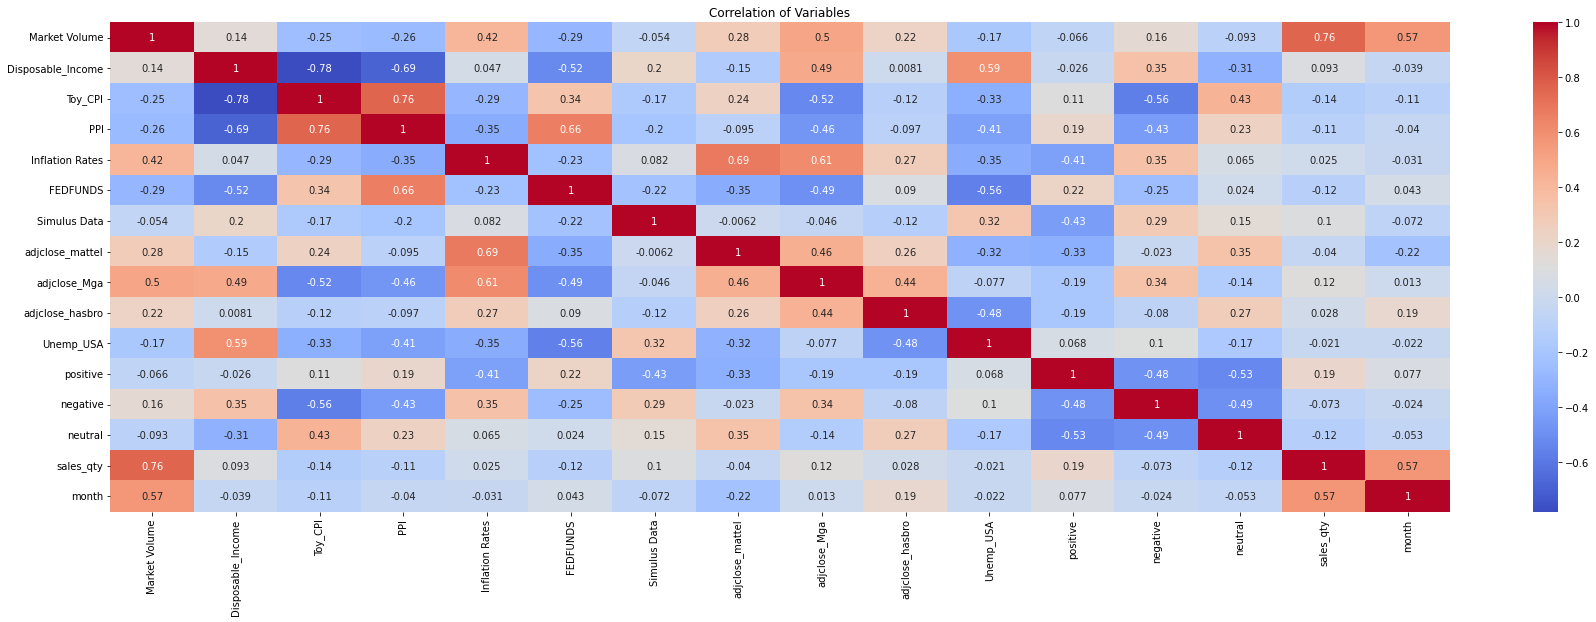

In [ ]:
import seaborn as sns
feature_names = list(df2.columns[0:len(df2.columns)])
print('Correlation Heat Map')
print()
plt.figure(figsize = (30,9))
sns.heatmap(pd.DataFrame(df2, columns=feature_names).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation of Variables')
plt.show()

In [ ]:
import xgboost

In [ ]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
X = df2.drop(['sales_qty'],axis=1)

In [ ]:
y = df2['sales_qty']

In [ ]:
# split the data into train and test partitions
# we will use 90% of the data for train, and 10% for validation
train_pct_index = int(60)
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#fitting for train test
model_train = XGBRegressor()
model_train.fit(X_train, y_train)

[16:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#predicting
train_pred_1=model_train.predict(X_train)
test_pred_1=model_train.predict(X_test)

In [ ]:
# RMSE Computation
rmse_train_1 = np.sqrt(MSE(y_train, train_pred_1))
rmse_test_1 = np.sqrt(MSE(y_test, test_pred_1))
print("RMSE : % f" %(rmse_train_1))
print("RMSE : % f" %(rmse_test_1))

RMSE :  110093.009529
RMSE :  775151.804249


In [ ]:
#mse
mse_train_1 = MSE(y_train, train_pred_1)
mse_test_1 = MSE(y_test, test_pred_1)
print("MSE : % f" %(mse_train_1))
print("MSE : % f" %(mse_test_1))

MSE :  12120470747.207293
MSE :  600860319629.718750


In [ ]:
#r2
r2_train_1=r2_score(y_train, train_pred_1)
r2_test_1=r2_score(y_test, test_pred_1) 
print("R2 : % f" %(r2_train_1))
print("R2 : % f" %(r2_test_1))


R2 :  0.998931
R2 : -1.152390


In [ ]:
#mae
mae_train_1 = MAE(y_train, train_pred_1)
mae_test_1 = MAE(y_test, test_pred_1)
print("MAE : % f" %(mae_train_1))
print("MAE : % f" %(mae_test_1))

MAE :  92802.279167
MAE :  697301.312500


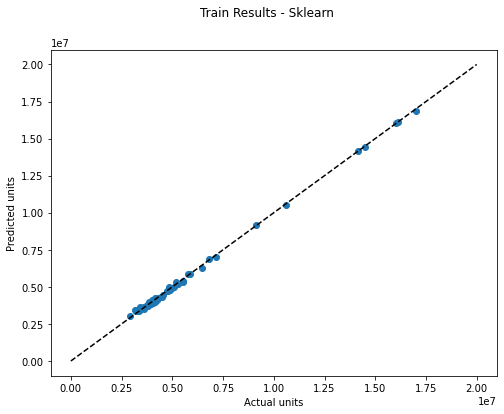

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_pred_1)
plt.plot([0, 20000000], [0, 20000000], '--k') 
plt.axis('tight')
plt.xlabel('Actual units')
plt.ylabel('Predicted units')
plt.suptitle('Train Results - Sklearn')
plt.show()

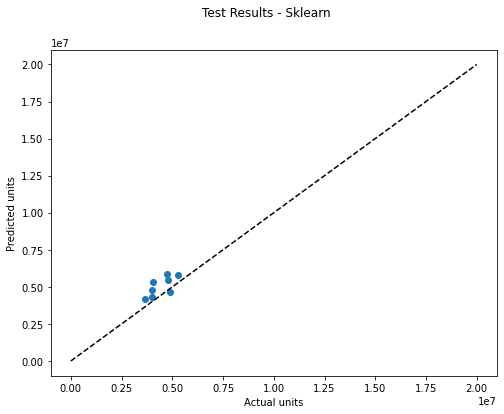

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_pred_1)
plt.plot([0, 20000000], [0, 20000000], '--k') 
plt.axis('tight')
plt.xlabel('Actual units')
plt.ylabel('Predicted units')
plt.suptitle('Test Results - Sklearn')
plt.show()

### Implementing grid search to find a better model for the data

In [ ]:
import xgboost as xgb

In [ ]:
# def hyperParameterTuning(X_train, y_train):
#     param_tuning = {
#         'learning_rate': [0.01, 0.05,0.1],
#         'max_depth': [3, 5, 7, 10,12,15],
#         'min_child_weight': [1, 3, 5,7,9],
#         'subsample': [0.5, 0.7,0.9],
#         'colsample_bytree': [0.5, 0.7,0.7],
#         'n_estimators' : [100, 200, 500,1000],
#         'objective': ['reg:squarederror']
#     }

#     xgb_model = XGBRegressor()

#     gsearch = GridSearchCV(estimator = xgb_model,
#                            param_grid = param_tuning,                        
#                            #scoring = 'neg_mean_absolute_error', #MAE
#                            #scoring = 'neg_mean_squared_error',  #MSE
#                            cv = 5,
#                            n_jobs = -1,
#                            verbose = 1)

#     gsearch.fit(X_train,y_train)

#     return gsearch.best_params_

In [ ]:
# hyperParameterTuning(X_train, y_train)

In [ ]:
# split the data into train and test partitions
# we will use 90% of the data for train, and 10% for validation
train_pct_index = int(36)
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modeling the parameters obtained from the grid search

In [ ]:
#fitting for train test
model_train = XGBRegressor(colsample_bytree=0.7,learning_rate=0.01,max_depth=3,min_child_weight=1,n_estimators=200,objective='reg:squarederror',subsample=0.9)
model_train.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, n_estimators=200,
             objective='reg:squarederror', subsample=0.9)

In [ ]:
#predicting
train_pred_1=model_train.predict(X_train)
test_pred_1=model_train.predict(X_test)

In [ ]:
# RMSE Computation
rmse_train_1 = np.sqrt(MSE(y_train, train_pred_1))
rmse_test_1 = np.sqrt(MSE(y_test, test_pred_1))
print("RMSE : % f" %(rmse_train_1))
print("RMSE : % f" %(rmse_test_1))

RMSE :  1409723.410783
RMSE :  1541068.132337


In [ ]:
#mse
mse_train_1 = MSE(y_train, train_pred_1)
mse_test_1 = MSE(y_test, test_pred_1)
print("MSE : % f" %(mse_train_1))
print("MSE : % f" %(mse_test_1))

MSE :  1987320094908.857666
MSE :  2374890988504.316406


In [ ]:
#r2
r2_train_1=r2_score(y_train, train_pred_1)
r2_test_1=r2_score(y_test, test_pred_1) 
print("R2 : % f" %(r2_train_1))
print("R2 : % f" %(r2_test_1))


R2 :  0.839590
R2 :  0.683202


In [ ]:
#mae
mae_train_1 = MAE(y_train, train_pred_1)
mae_test_1 = MAE(y_test, test_pred_1)
print("MAE : % f" %(mae_train_1))
print("MAE : % f" %(mae_test_1))

MAE :  904249.847222
MAE :  1207118.953125


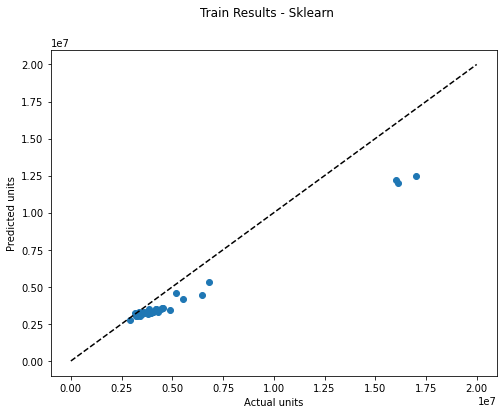

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_pred_1)
plt.plot([0, 20000000], [0, 20000000], '--k') 
plt.axis('tight')
plt.xlabel('Actual units')
plt.ylabel('Predicted units')
plt.suptitle('Train Results - Sklearn')
plt.show()

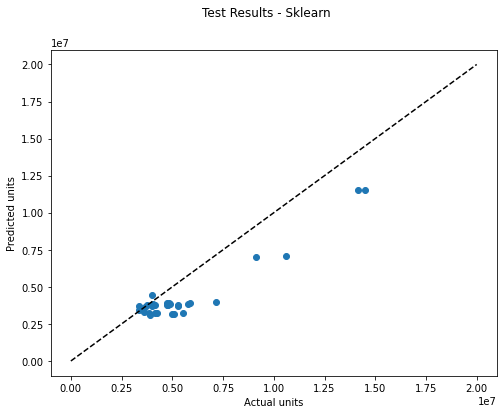

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_pred_1)
plt.plot([0, 20000000], [0, 20000000], '--k') 
plt.axis('tight')
plt.xlabel('Actual units')
plt.ylabel('Predicted units')
plt.suptitle('Test Results - Sklearn')
plt.show()

### partial dependence plots

In [ ]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_X_df = pd.DataFrame(X_train, columns=X.columns)
train_X_df.head()

,Market Volume,Disposable_Income,Toy_CPI,PPI,Inflation Rates,FEDFUNDS,Simulus Data,adjclose_mattel,adjclose_Mga,adjclose_hasbro,Unemp_USA,positive,negative,neutral,month
0,-0.551168,-1.632206,1.797471,-0.322622,0.970811,-1.810656,0.0,2.828669,-1.548870,-1.782034,2.290267,0.447787,-0.682654,0.277308,-1.593255
1,-0.553383,-1.544605,1.732824,-1.005821,1.492440,-1.792797,0.0,2.087161,-1.512558,-0.555606,1.974368,1.233100,-1.575433,0.486205,-1.303572
2,-0.167972,-1.406670,1.617569,-0.664222,0.709996,-1.560636,0.0,2.019751,-1.624053,-0.184893,1.342570,-1.579748,-0.332781,1.519695,-1.013890
3,-0.338527,-1.348350,1.484951,0.087298,0.188366,-1.364193,0.0,1.787805,-2.057781,-0.295584,1.342570,-1.765368,-0.779171,2.069424,-0.724207
4,-0.407193,-1.123782,1.394446,0.087298,-0.594078,-1.346334,0.0,1.376160,-1.478511,0.137450,1.342570,-0.880106,-0.634396,1.255825,-0.434524


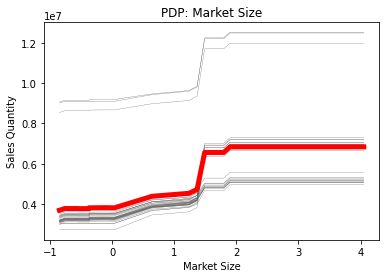

In [ ]:
tmpdf = ice(data=train_X_df, column='Market Volume', 
                   predict=model_train.predict)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Market Size')
plt.ylabel('Sales Quantity')
plt.xlabel('Market Size');
plt.show()

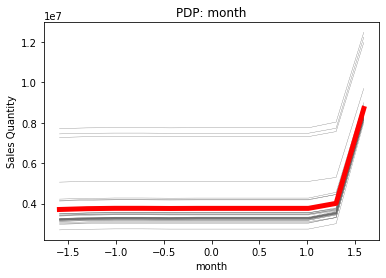

In [ ]:
tmpdf = ice(data=train_X_df, column='month', 
                   predict=model_train.predict)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: month')
plt.ylabel('Sales Quantity')
plt.xlabel('month');
plt.show()

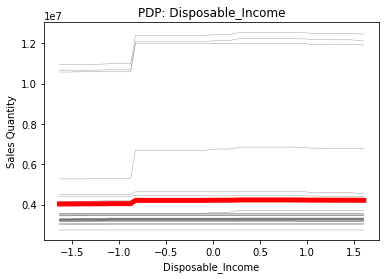

In [ ]:
tmpdf = ice(data=train_X_df, column='Disposable_Income', 
                   predict=model_train.predict)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True, 
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: Disposable_Income')
plt.ylabel('Sales Quantity')
plt.xlabel('Disposable_Income');
plt.show()

# **walk forward validation**

train = 1, test=67
This is train R2: nan
This is test R2: -1.1055271801889766
This is trainMAE: 1303558.75
This is testMAE: 3361575.167910448


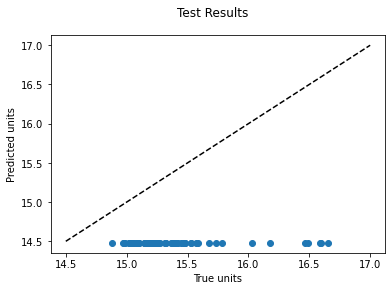

train = 2, test=66
This is train R2: -4.791213121186327
This is test R2: -0.6714209098252504
This is trainMAE: 1035091.5
This is testMAE: 2637074.621212121


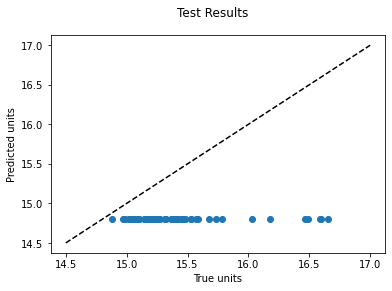

train = 3, test=65
This is train R2: -1.9171764450286242
This is test R2: -0.4273807609406126
This is trainMAE: 1044025.75
This is testMAE: 2132148.207692308


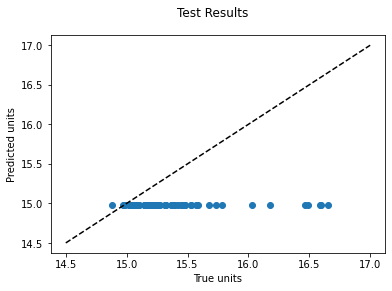

train = 4, test=64
This is train R2: -1.9068275328985895
This is test R2: -0.3761971876335153
This is trainMAE: 923601.5
This is testMAE: 2031356.6796875


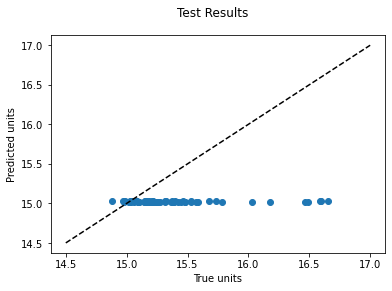

train = 5, test=63
This is train R2: -1.0642135039849427
This is test R2: -0.5961788290025556
This is trainMAE: 837336.75
This is testMAE: 2536855.257936508


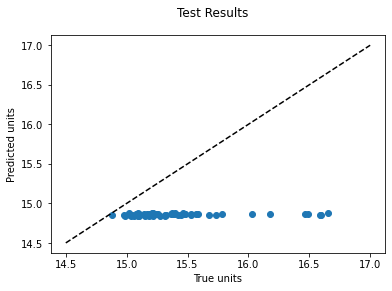

train = 6, test=62
This is train R2: -1.2632738904515368
This is test R2: -0.4824738714245811
This is trainMAE: 794390.0833333334
This is testMAE: 2296005.306451613


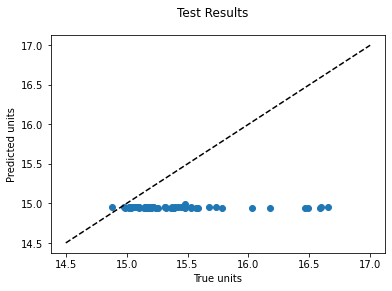

train = 7, test=61
This is train R2: -1.2890553832532592
This is test R2: -0.4947579186943707
This is trainMAE: 748480.0357142857
This is testMAE: 2334971.905737705


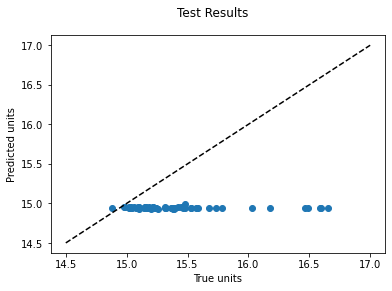

train = 8, test=60
This is train R2: -1.398620624538807
This is test R2: -0.4901736195029638
This is trainMAE: 722933.90625
This is testMAE: 2335841.7625


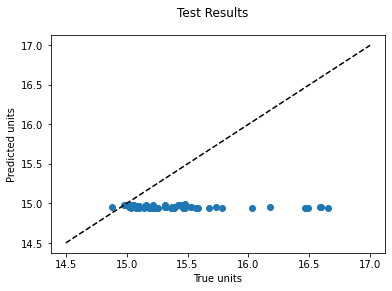

train = 9, test=59
This is train R2: -1.3230639235321795
This is test R2: -0.41698019998504177
This is trainMAE: 715508.2777777778
This is testMAE: 2200909.377118644


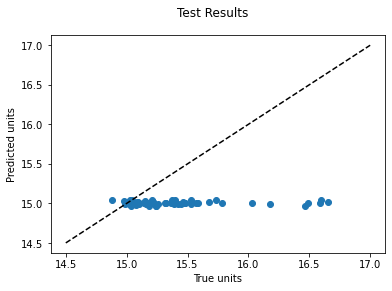

train = 10, test=58
This is train R2: -1.4217290898435668
This is test R2: -0.40675220257681044
This is trainMAE: 695502.7
This is testMAE: 2192010.6077586208


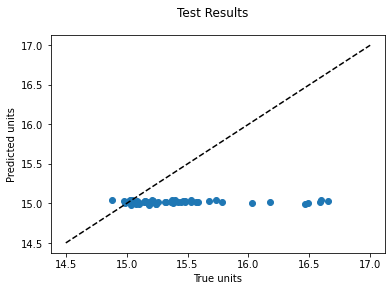

train = 11, test=57
This is train R2: -0.2043103079235229
This is test R2: -0.25624022338485286
This is trainMAE: 776443.1363636364
This is testMAE: 1951334.9298245613


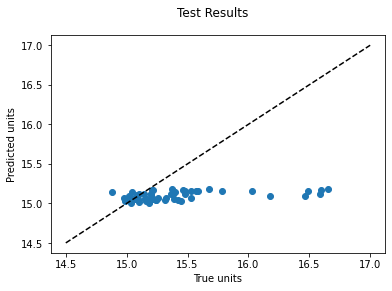

train = 12, test=56
This is train R2: 0.6457780832644464
This is test R2: 0.28523707344797156
This is trainMAE: 1202107.2083333333
This is testMAE: 1678323.1785714286


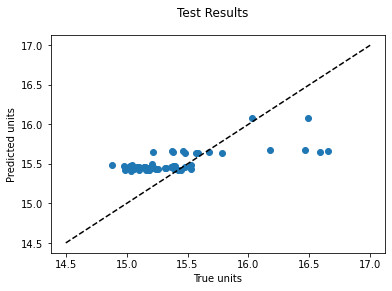

train = 13, test=55
This is train R2: 0.6362687023086266
This is test R2: 0.2704211230717093
This is trainMAE: 1144514.5
This is testMAE: 1373247.1545454545


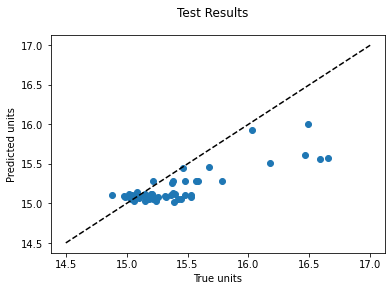

train = 14, test=54
This is train R2: 0.6467573066930483
This is test R2: 0.20273766243544122
This is trainMAE: 1104475.8392857143
This is testMAE: 1571579.7175925926


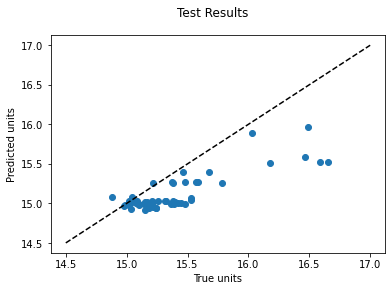

train = 15, test=53
This is train R2: 0.6560829858809314
This is test R2: 0.2863929655146241
This is trainMAE: 1078892.5666666667
This is testMAE: 1391721.3632075472


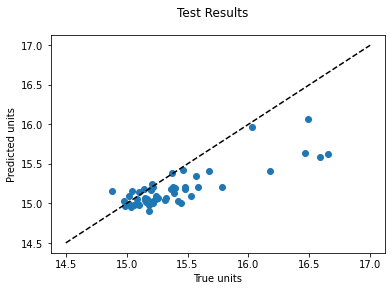

train = 16, test=52
This is train R2: 0.6432739999288104
This is test R2: 0.1801688886318189
This is trainMAE: 1060091.234375
This is testMAE: 1731967.7788461538


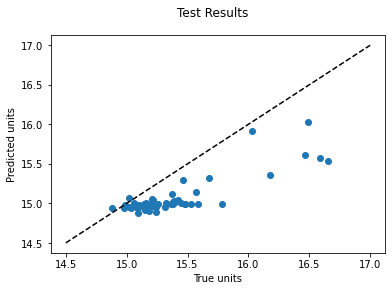

train = 17, test=51
This is train R2: 0.6532872424019789
This is test R2: 0.16333175557367774
This is trainMAE: 1013448.0882352941
This is testMAE: 1856330.8333333333


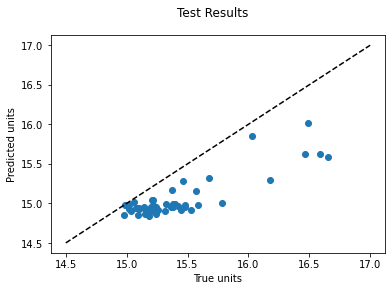

train = 18, test=50
This is train R2: 0.6488970001301899
This is test R2: 0.16271699095715175
This is trainMAE: 995909.8333333334
This is testMAE: 1797410.735


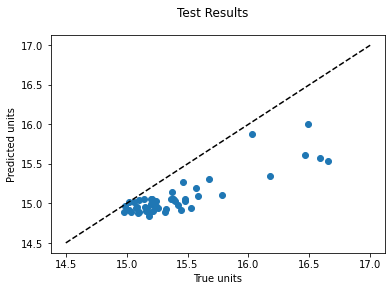

train = 19, test=49
This is train R2: 0.6592757823798656
This is test R2: 0.19498084519236658
This is trainMAE: 959588.8815789474
This is testMAE: 1800069.9897959183


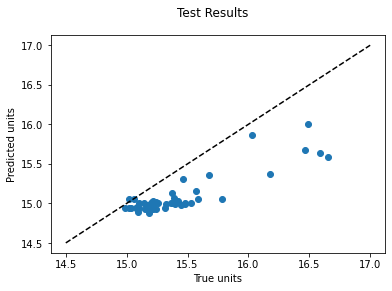

train = 20, test=48
This is train R2: 0.6619386660588782
This is test R2: 0.18722671772111688
This is trainMAE: 938288.8875
This is testMAE: 1781618.9114583333


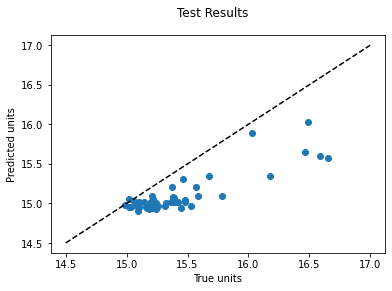

train = 21, test=47
This is train R2: 0.6548851303176326
This is test R2: 0.14384554416720785
This is trainMAE: 909149.5595238095
This is testMAE: 1787404.8882978724


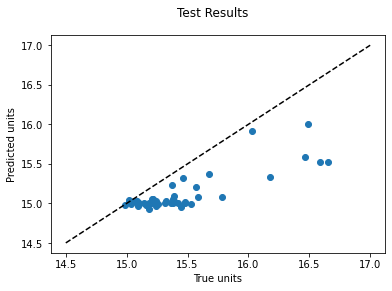

train = 22, test=46
This is train R2: 0.6623746153910274
This is test R2: 0.17119242246171607
This is trainMAE: 896502.6704545454
This is testMAE: 1805777.875


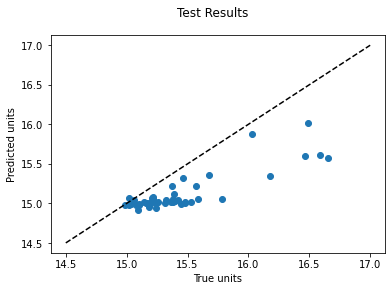

train = 23, test=45
This is train R2: 0.6548825874402278
This is test R2: 0.22185491070511876
This is trainMAE: 909460.9891304348
This is testMAE: 1632416.8666666667


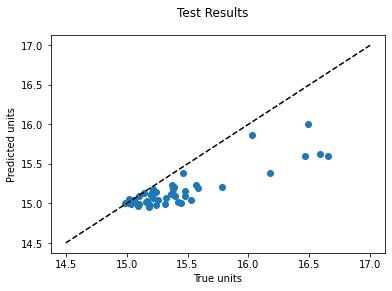

train = 24, test=44
This is train R2: 0.7945492755104886
This is test R2: 0.6796030878164026
This is trainMAE: 982557.3125
This is testMAE: 1094716.0397727273


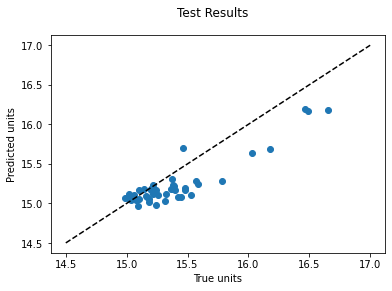

train = 25, test=43
This is train R2: 0.7950841601051303
This is test R2: 0.5994874417791037
This is trainMAE: 964054.08
This is testMAE: 1235533.5813953488


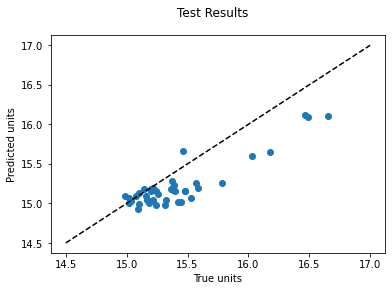

train = 26, test=42
This is train R2: 0.7981389478654284
This is test R2: 0.6820923628707335
This is trainMAE: 939241.8461538461
This is testMAE: 1172271.5297619049


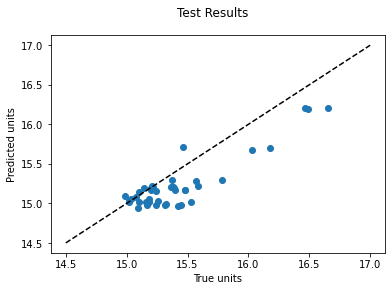

train = 27, test=41
This is train R2: 0.7877073690034696
This is test R2: 0.5868414783258973
This is trainMAE: 944655.0555555555
This is testMAE: 1275745.5609756098


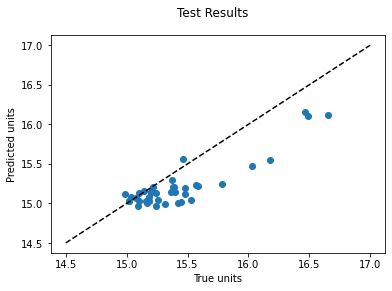

train = 28, test=40
This is train R2: 0.7913685574746404
This is test R2: 0.6350060858465971
This is trainMAE: 921107.6339285715
This is testMAE: 1247335.475


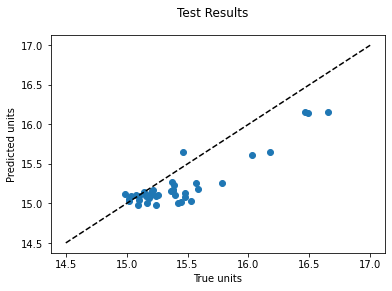

train = 29, test=39
This is train R2: 0.8000786015677381
This is test R2: 0.5444361250647098
This is trainMAE: 897518.1379310344
This is testMAE: 1476492.3846153845


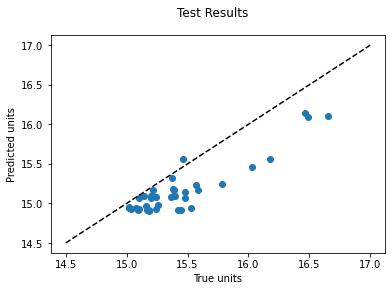

train = 30, test=38
This is train R2: 0.7787971744906812
This is test R2: 0.5938315755216722
This is trainMAE: 903302.6166666667
This is testMAE: 1437951.4934210526


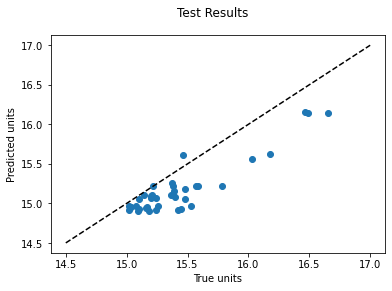

train = 31, test=37
This is train R2: 0.7865093561450589
This is test R2: 0.6090787228047149
This is trainMAE: 887455.5241935484
This is testMAE: 1399165.1013513512


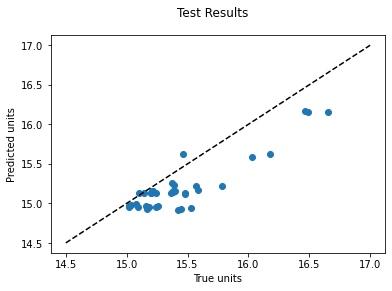

train = 32, test=36
This is train R2: 0.7877498302374927
This is test R2: 0.560552735914617
This is trainMAE: 867326.3125
This is testMAE: 1490186.6180555555


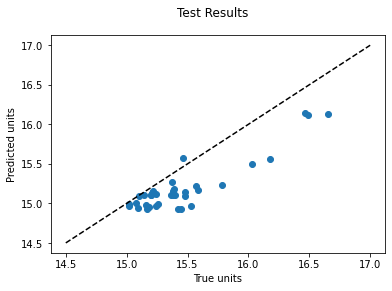

train = 33, test=35
This is train R2: 0.7914249735531018
This is test R2: 0.5448744679469304
This is trainMAE: 855005.3787878788
This is testMAE: 1441027.4142857143


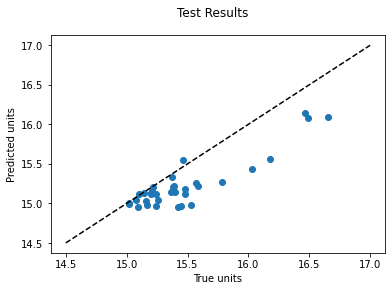

train = 34, test=34
This is train R2: 0.7843403682982224
This is test R2: 0.5357331627229256
This is trainMAE: 849231.8602941176
This is testMAE: 1536170.9852941176


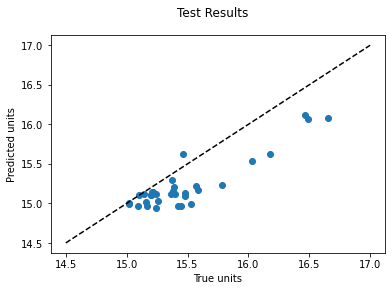

train = 35, test=33
This is train R2: 0.7921986029442761
This is test R2: 0.5997903861979006
This is trainMAE: 839801.2071428571
This is testMAE: 1528485.196969697


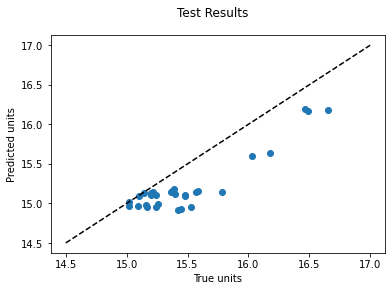

train = 36, test=32
This is train R2: 0.8396915229730006
This is test R2: 0.6842138778365777
This is trainMAE: 904004.5972222222
This is testMAE: 1203949.671875


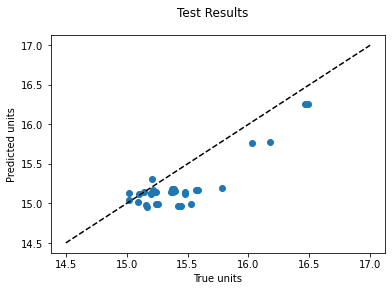

train = 37, test=31
This is train R2: 0.8385230043674555
This is test R2: 0.6674628728812397
This is trainMAE: 898731.6148648649
This is testMAE: 1255899.2096774194


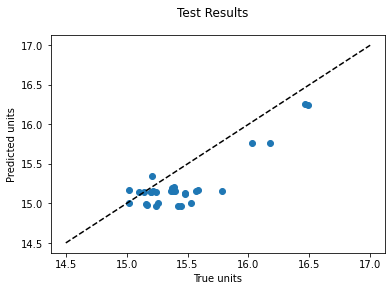

train = 38, test=30
This is train R2: 0.836834073233147
This is test R2: 0.6403628965360892
This is trainMAE: 891528.0197368421
This is testMAE: 1288023.8083333333


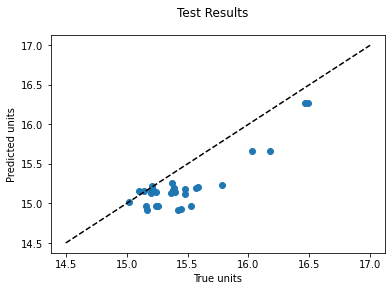

train = 39, test=29
This is train R2: 0.836573547892868
This is test R2: 0.7087751203125928
This is trainMAE: 880503.4358974359
This is testMAE: 1180858.396551724


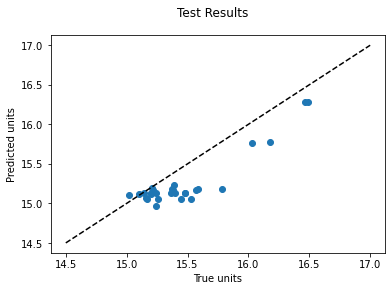

train = 40, test=28
This is train R2: 0.8267538879577897
This is test R2: 0.7407704997670043
This is trainMAE: 893827.88125
This is testMAE: 1122044.892857143


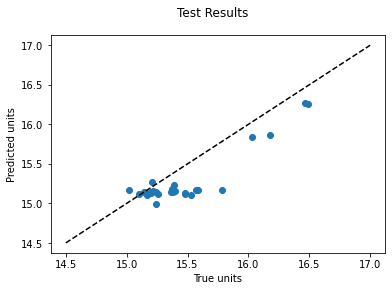

train = 41, test=27
This is train R2: 0.8372411840826557
This is test R2: 0.7143961157456389
This is trainMAE: 868414.2195121951
This is testMAE: 1219949.0648148148


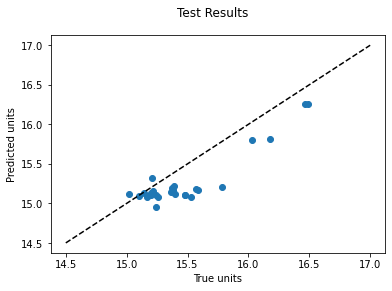

train = 42, test=26
This is train R2: 0.8344488406396504
This is test R2: 0.6870595642390833
This is trainMAE: 857202.2976190476
This is testMAE: 1248216.1442307692


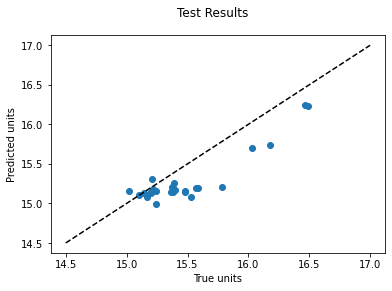

train = 43, test=25
This is train R2: 0.8274085707750876
This is test R2: 0.6799443455765286
This is trainMAE: 852160.9709302326
This is testMAE: 1303749.7


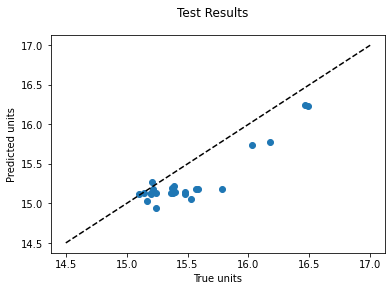

train = 44, test=24
This is train R2: 0.8300261587693439
This is test R2: 0.6431575694700643
This is trainMAE: 846641.4147727273
This is testMAE: 1409370.21875


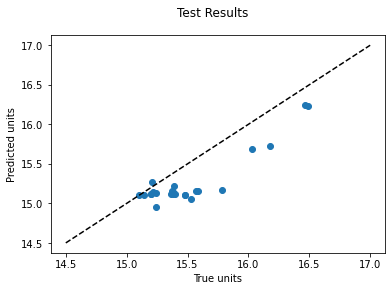

train = 45, test=23
This is train R2: 0.8316627891220367
This is test R2: 0.7256529142877844
This is trainMAE: 845928.3222222222
This is testMAE: 1218867.6847826086


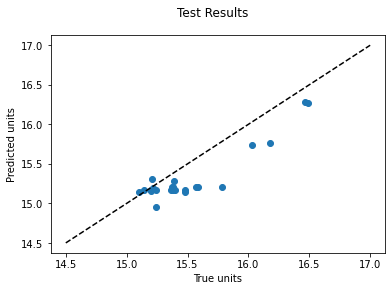

train = 46, test=22
This is train R2: 0.8331131926452731
This is test R2: 0.687167918948875
This is trainMAE: 840196.7771739131
This is testMAE: 1327477.8522727273


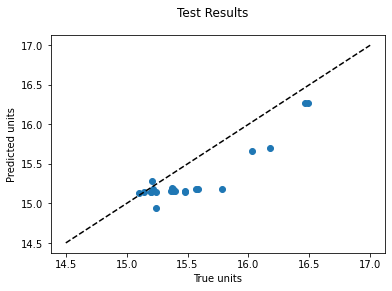

train = 47, test=21
This is train R2: 0.8286866997668978
This is test R2: 0.7818700649950943
This is trainMAE: 864216.3882978724
This is testMAE: 1061885.8095238095


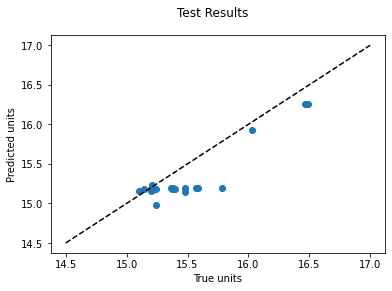

train = 48, test=20
This is train R2: 0.845549996310151
This is test R2: 0.6990600893115828
This is trainMAE: 888233.0520833334
This is testMAE: 975443.3375


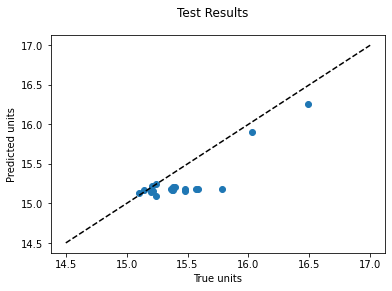

train = 49, test=19
This is train R2: 0.8452599762631104
This is test R2: 0.6668469857865219
This is trainMAE: 879575.6428571428
This is testMAE: 1105949.3026315789


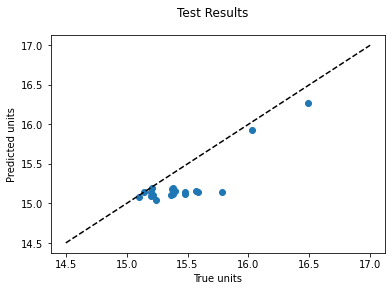

train = 50, test=18
This is train R2: 0.8442691220042872
This is test R2: 0.6787802434419238
This is trainMAE: 875531.605
This is testMAE: 1082122.6944444445


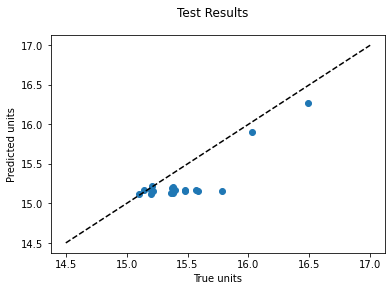

train = 51, test=17
This is train R2: 0.8396092016677614
This is test R2: 0.8754725800983569
This is trainMAE: 881241.1274509804
This is testMAE: 709463.9411764706


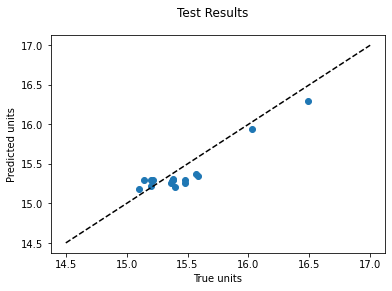

train = 52, test=16
This is train R2: 0.8412895153558949
This is test R2: 0.8124060685718059
This is trainMAE: 877144.1826923077
This is testMAE: 886590.765625


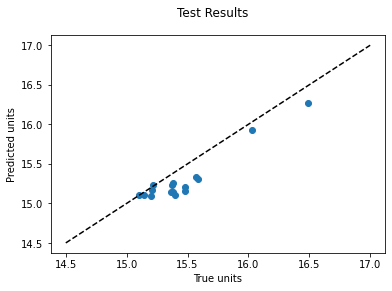

train = 53, test=15
This is train R2: 0.8421111302203116
This is test R2: 0.7710893790809314
This is trainMAE: 864094.4433962264
This is testMAE: 1084965.6833333333


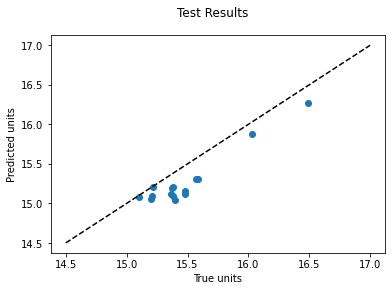

train = 54, test=14
This is train R2: 0.8356675118108015
This is test R2: 0.82951800310157
This is trainMAE: 873499.3518518518
This is testMAE: 929521.4285714285


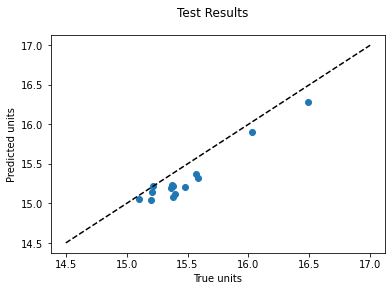

train = 55, test=13
This is train R2: 0.8386409897430184
This is test R2: 0.855098429345992
This is trainMAE: 861454.0818181818
This is testMAE: 867290.1153846154


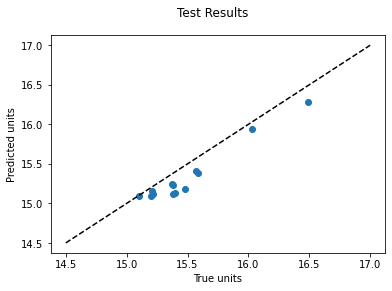

train = 56, test=12
This is train R2: 0.8347063944687312
This is test R2: 0.8708521878369486
This is trainMAE: 862727.3482142857
This is testMAE: 780787.7291666666


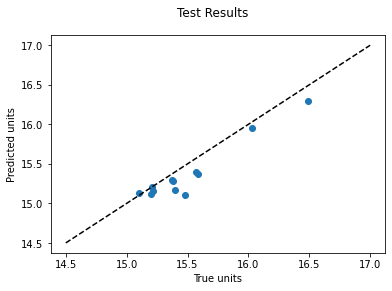

train = 57, test=11
This is train R2: 0.8333331474691172
This is test R2: 0.874683711260416
This is trainMAE: 859660.4649122807
This is testMAE: 778478.4318181818


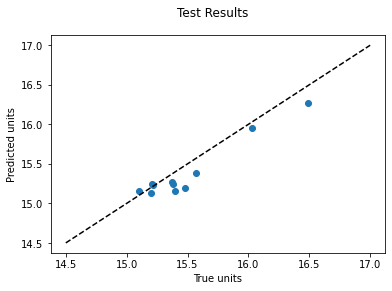

train = 58, test=10
This is train R2: 0.8321094681681956
This is test R2: 0.8976699737837109
This is trainMAE: 859969.275862069
This is testMAE: 737056.875


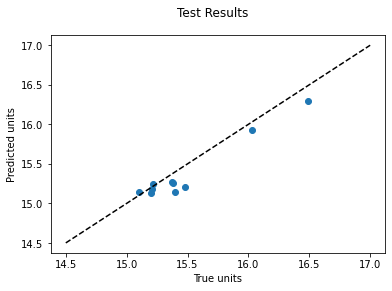

train = 59, test=9
This is train R2: 0.8345247245559596
This is test R2: 0.8711141519387023
This is trainMAE: 869045.0084745763
This is testMAE: 802783.8888888889


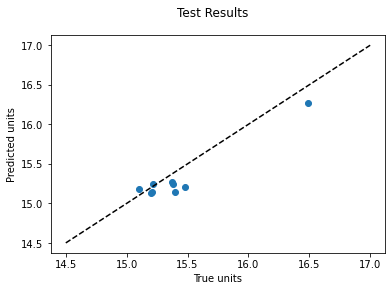

train = 60, test=8
This is train R2: 0.8448644939164256
This is test R2: -0.5254163054372909
This is trainMAE: 894024.9041666667
This is testMAE: 508318.8125


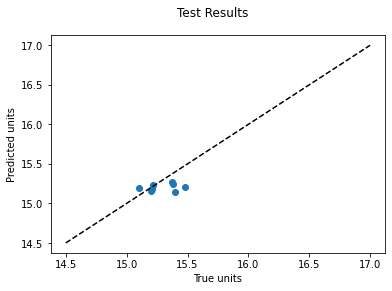

train = 61, test=7
This is train R2: 0.845234437502981
This is test R2: -1.5304447273240833
This is trainMAE: 887216.0737704918
This is testMAE: 590616.6785714285


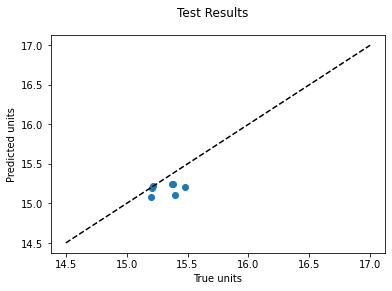

train = 62, test=6
This is train R2: 0.8512816291369444
This is test R2: -2.299238673954439
This is trainMAE: 875662.9072580645
This is testMAE: 663308.0833333334


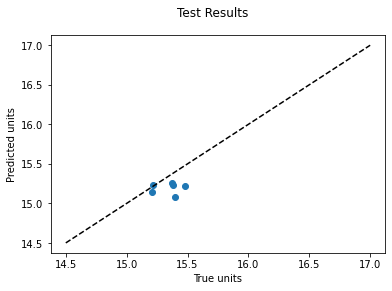

train = 63, test=5
This is train R2: 0.846983989278111
This is test R2: -1.7750776552272152
This is trainMAE: 877024.8412698413
This is testMAE: 486681.75


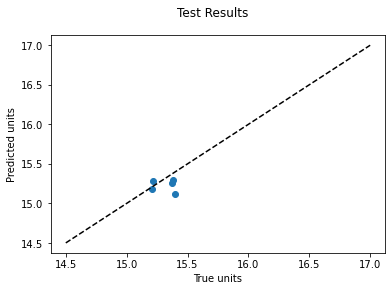

train = 64, test=4
This is train R2: 0.8460051318203302
This is test R2: -1.5042405775757275
This is trainMAE: 872076.84375
This is testMAE: 422597.0625


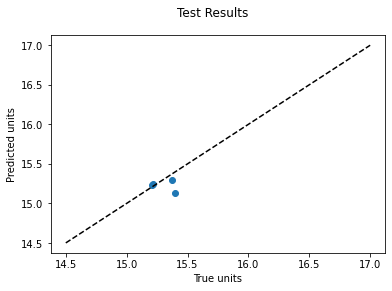

train = 65, test=3
This is train R2: 0.8445983845976913
This is test R2: -2.3720790149923436
This is trainMAE: 868047.0807692307
This is testMAE: 520878.0


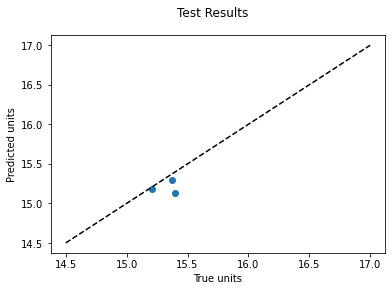

train = 66, test=2
This is train R2: 0.8429118352852185
This is test R2: 0.6885810217837196
This is trainMAE: 869575.8636363636
This is testMAE: 159459.75


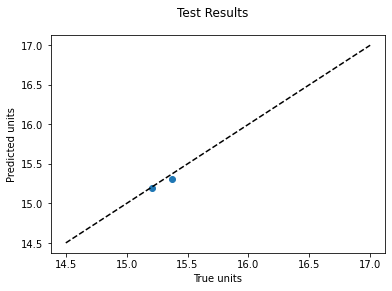

train = 67, test=1
This is train R2: 0.8435998312457706
This is test R2: nan
This is trainMAE: 863019.3917910447
This is testMAE: 415690.0


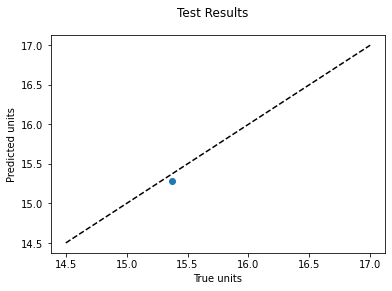

In [ ]:
train_mae = []
test_mae = []
train_r_2 = []
test_r_2 = []


n_train = 1
n_records = len(X)
for i in range(n_train,n_records,1):
  X_train, X_test = X[0:i],X[i:]
  y_train,y_test = y[0:i],y[i:]
  print('train = %d, test=%d'% (len(y_train),len(y_test)))

  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  model_train = XGBRegressor(colsample_bytree=0.7,learning_rate=0.01,max_depth=3,min_child_weight=1,n_estimators=200,objective='reg:squarederror',subsample=0.9)

  model_train.fit(X_train, y_train)
  train_preds_sklearn = model_train.predict(X_train) 
  test_preds_sklearn = model_train.predict(X_test)
  
  
  print("This is train R2:", r2_score(y_train, train_preds_sklearn)) # train
  print("This is test R2:", r2_score(y_test, test_preds_sklearn)) # test
  
  trainMAE = mean_absolute_error(y_train, train_preds_sklearn)
  print("This is trainMAE:", trainMAE) # train
  testMAE = mean_absolute_error(y_test, test_preds_sklearn)
  print("This is testMAE:", testMAE) # test

  plt.figure(figsize=(6, 4))
  plt.scatter(x=np.log(y_test), y=np.log(test_preds_sklearn))
  plt.plot([14.5, 17], [14.5, 17], '--k') # 45 degree line
  plt.axis('tight')
  plt.xlabel('True units')
  plt.ylabel('Predicted units')
  plt.suptitle('Test Results')
  plt.show()
  test_mae.append(testMAE)
  train_mae.append(trainMAE)
  train_r_2.append(r2_score(y_train, train_preds_sklearn))
  test_r_2.append(r2_score(y_test, test_preds_sklearn))

### plotting graphs for test and train mae

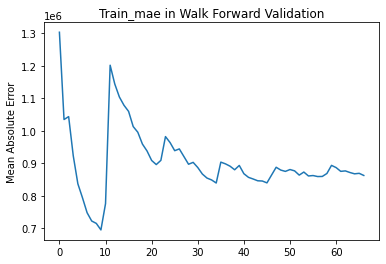

In [ ]:
plt.plot(train_mae)
plt.title('Train_mae in Walk Forward Validation')
plt.ylabel('Mean Absolute Error')
plt.show()

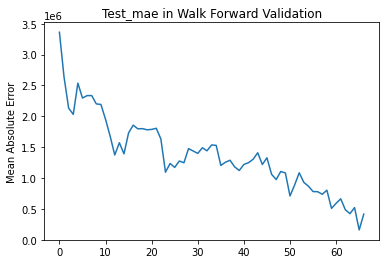

In [ ]:
plt.plot(test_mae)
plt.title('Test_mae in Walk Forward Validation')
plt.ylabel('Mean Absolute Error')
plt.show()